In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
words=open('indian_names.txt','r').read().splitlines()
len(words)

6487

In [6]:
chs=sorted(list(set(''.join(words))))
stoi={s:i for i,s in enumerate(chs)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)
    

{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [7]:
block_size=3 # context length i.e from how many chars we predict the next one
x,y=[],[] 
for w in words:
    # print(w)
    context=[0]*block_size #initially it has context 3
    for ch in w+'.':
        ix=stoi[ch]
        x.append(context)
        y.append(ix)
        # print(''.join((itos[i]) for i in context),'----->',itos[ix]) #converts the context into the list
        context=context[1:]+[ix] # to remove the first element and add the new element in the last to update the context

x=torch.tensor(x)
y=torch.tensor(y)


In [8]:
x.shape ,x.dtype ,y.shape,y.dtype

(torch.Size([47706, 3]), torch.int64, torch.Size([47706]), torch.int64)

In [9]:
C=torch.randn(27,2).float() #look up table 
C

tensor([[-0.1633, -0.3500],
        [-0.3020,  0.0486],
        [ 0.1446, -1.3603],
        [ 0.0792,  0.8552],
        [-1.1304,  0.3200],
        [-1.2117, -0.7206],
        [-0.7974, -1.3588],
        [-1.6786, -1.1058],
        [-1.5928,  0.7410],
        [-0.4886, -0.8286],
        [-0.7688,  0.1404],
        [-0.4829, -1.4034],
        [-1.5068,  0.4597],
        [ 0.4664, -0.2795],
        [ 0.8081, -0.3924],
        [ 1.3355, -0.7316],
        [-0.7066,  0.2690],
        [-1.5185, -0.4819],
        [-1.9244, -2.7804],
        [-0.2048,  0.1373],
        [-0.2182, -0.0032],
        [-0.7795,  2.2024],
        [-0.0718, -0.9459],
        [ 0.1566, -1.2472],
        [ 0.2665,  0.0561],
        [-1.0252,  0.2959],
        [ 0.7228,  0.1753]])

In [10]:
C[5]

tensor([-1.2117, -0.7206])

In [11]:
C[[5,6,7]] # call with a list of value

tensor([[-1.2117, -0.7206],
        [-0.7974, -1.3588],
        [-1.6786, -1.1058]])

In [12]:
C[x] .shape#X as a value passes to C

torch.Size([47706, 3, 2])

In [13]:
# emb=C[x]plt.plot(lri,lossi)

In [14]:
# torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape # its only for fixed block size 3


In [15]:
W1=torch.randn(6,100)
b1=torch.randn(100)

In [16]:
# emb=torch.cat(torch.unbind(emb,1),1).shape # for all block size

In [17]:
emb=C[x]

In [18]:
h=torch.tanh(emb.view(-1,6) @ W1 + b1) # -1 for any value in x like 32
h

tensor([[-0.0443,  0.9724,  0.0887,  ..., -0.9128,  0.6152, -0.8230],
        [-0.0501,  0.9065, -0.5605,  ..., -0.8861,  0.3492, -0.7633],
        [-0.0982,  0.7752, -0.5853,  ..., -0.6323, -0.3230, -0.7867],
        ...,
        [-0.4475, -0.8481, -0.8796,  ...,  0.9990, -0.9997, -0.9860],
        [ 0.0632,  1.0000, -0.3869,  ..., -0.9903,  0.9977,  0.2226],
        [-0.1198,  0.9993,  0.9960,  ..., -0.9872,  0.9395, -0.9913]])

In [19]:
W2=torch.randn(100,27)
b2=torch.randn(27)
logits=h @ W2 + b2 #softmax function
counts=logits.log() #finding fake counts to normalize the values
prob=counts/counts.sum(1,keepdim=True)
#instead of using the 3 lines ,we use cross entropy to execute the softmax function
prob.shape

torch.Size([47706, 27])

In [20]:
y

tensor([1, 1, 2,  ..., 5, 2, 0])

In [21]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,10),generator =g ,requires_grad=True) # using 10 for 10 neurons 
W1=torch.randn((30,200),generator=g) # there are three unputs for each neuron 
b1=torch.randn((200),generator=g) #using broadcasting to take copy of valiues
W2=torch.randn((200,27),generator=g) #gives a character from 27 characters so we are using 27
b2=torch.randn((27),generator=g)
parameters=[C,W1,b1,W2,b2]

In [22]:
sum(p.nelement() for p in parameters)

11897

In [23]:
for p in parameters:
    p.requires_grad=True

In [24]:
# for _ in range(100):
#     #forward pass
#     emb=C[x]
#    print(''.join((itos[i]) for i in context),'----->',itos[ix])   h=torch.tanh(emb.view(-1,6) @ W1 + b1)
#     logits=h @ W2 + b2
#     loss=F.cross_entropy(logits,y)
#     print(loss.item())
#     #backward pass
#     for p in parameters:
#          p.grad=None
#     loss.backward()
#     #update
#     for p in parameters:
#          p.data+=-0.1*p.grad
# print(loss.item())


In [25]:
torch.randint(0,5,(32,))


tensor([1, 4, 1, 4, 1, 1, 1, 2, 1, 3, 2, 2, 3, 3, 2, 0, 4, 0, 3, 0, 2, 1, 2, 4,
        3, 0, 1, 4, 3, 2, 2, 3])

In [26]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre

In [ ]:
# using xtr and ytr
lri=[]
lossi=[]
stepi=[]
for i in range(50):
    ix=torch.randint(0,xtr.shape[0],(32,)) #mini batch constructed
    emb=C[xtr[ix]] #32,3,10 
    h=torch.tanh(emb.view(-1,30) @ W1 + b1) 
    logits=h @ W2 + b2
    loss=F.cross_entropy(logits,ytr[ix])
#     print(loss.item())
    #backward pass
    for p in parameters:
         p.grad=None
    loss.backward()
    #update
    lr=0.01
    for p in parameters:
         p.data+=-lr*p.grad
    # lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)
# print(loss.item())



1 torch.Size([32, 3, 10]) torch.Size([30, 200]) 

torch.Size([32, 30]) torch.Size([30, 200])
1 torch.Size([32, 3, 10]) torch.Size([30, 200]) 

torch.Size([32, 30]) torch.Size([30, 200])
1 torch.Size([32, 3, 10]) torch.Size([30, 200]) 

torch.Size([32, 30]) torch.Size([30, 200])
1 torch.Size([32, 3, 10]) torch.Size([30, 200]) 

torch.Size([32, 30]) torch.Size([30, 200])
1 torch.Size([32, 3, 10]) torch.Size([30, 200]) 

torch.Size([32, 30]) torch.Size([30, 200])
1 torch.Size([32, 3, 10]) torch.Size([30, 200]) 

torch.Size([32, 30]) torch.Size([30, 200])
1 torch.Size([32, 3, 10]) torch.Size([30, 200]) 

torch.Size([32, 30]) torch.Size([30, 200])
1 torch.Size([32, 3, 10]) torch.Size([30, 200]) 

torch.Size([32, 30]) torch.Size([30, 200])
1 torch.Size([32, 3, 10]) torch.Size([30, 200]) 

torch.Size([32, 30]) torch.Size([30, 200])
1 torch.Size([32, 3, 10]) torch.Size([30, 200]) 

torch.Size([32, 30]) torch.Size([30, 200])
1 torch.Size([32, 3, 10]) torch.Size([30, 200]) 

torch.Size([32, 30])

In [31]:
loss

tensor(14.3107, grad_fn=<NllLossBackward0>)

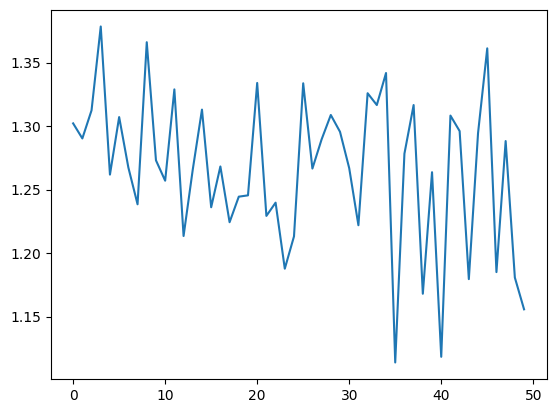

In [32]:
plt.plot(stepi,lossi)

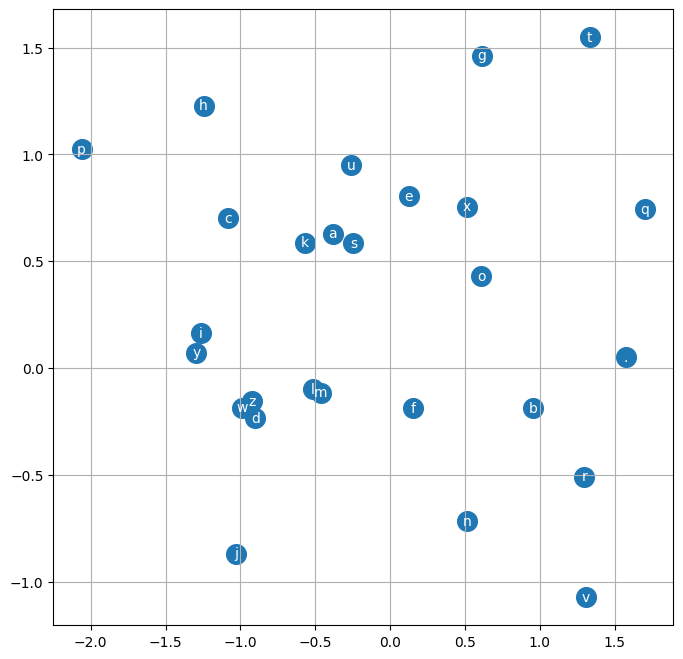

In [33]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [34]:
ix=torch.randint(0,xdev.shape[0],(32,)) #mini batch constructed
emb=C[xdev[ix]] #32,3,2 
h=torch.tanh(emb.view(-1,30) @ W1 + b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,ydev[ix])
loss


tensor(20.4489, grad_fn=<NllLossBackward0>)

In [35]:
ix=torch.randint(0,xte.shape[0],(32,)) #mini batch constructed
emb=C[xte[ix]] #32,3,2 
h=torch.tanh(emb.view(-1,30) @ W1 + b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,yte[ix])
loss


tensor(19.1573, grad_fn=<NllLossBackward0>)

In [36]:
# plt.plot(lri,lossi)

In [37]:
# to avoid overfiting
# #80% - training split
#10% - dev/validation split
#10% - test split

In [38]:
#creating a dataset
def build_dataset(words): #TO split in three parts
    block_size=3 # context length i.e from how many chars we predict the next one
    x,y=[],[] 
    for w in words:
       print(w)
       context=[0]*block_size #initially it has context 3
       for ch in w+'.':
          ix=stoi[ch]
          x.append(context)
          y.append(ix)
        #   print(''.join((itos[i]) for i in context),'----->',itos[ix])   #converts the context into the list
          context=context[1:]+[ix] # to remove the first element and add the new element in the last to update the context
    x=torch.tensor(x)
    y=torch.tensor(y)
    print(x.shape,y.shape)
    return x,y
import random
random.seed(42)
random.shuffle(words) # shuffle all the words in a particular ordergit config --global
n1=int(0.8*len(words)) #0.8 * 32000=28000 (app)
n2=int(0.9*len(words)) #0.9 * 32000=25000
xtr,ytr=build_dataset(words[:n1])
xdev,ydev=build_dataset(words[n1:n2]) #n1-n2
xte,yte=build_dataset(words[n2:])


nazani
arbaz
pharjana
sushela
khangara
chhaterwati
vanshika
amana
tarbez
fakir
subin
ajnoor
kuldeep
baliram
mehbob
pushank
sekha
dowlat
sanjit
aachal
kangana
sahishta
yogeshwari
saveta
ratani
jamir
musrat
hemuna
shelesh
sucheta
prateek
jainub
tuba
hazi
novisha
jarim
sunaki
abhisek
vandita
mahammd
ghanshyam
badarjahan
nency
nazma
kaluram
shaurabh
jang
razida
satu
mitali
jay
ameer
ramdin
ishan
narayani
mohmed
yashodha
yameen
warish
kanhyalal
bhawana
mangilal
najreen
ranpal
kiniya
shreee
shokat
sosan
purnima
maha
fulo
dharm
choti
manish
dalip
subhdra
godambari
ashlam
lav
sally
jhumki
alkesh
rubby
aanil
udaiveer
mani
tulshi
satnosh
manbhari
aravind
brahmanand
ateek
brijnandan
himanshee
lakhu
asiwani
javitri
seema
pabitra
smriti
akkash
asanti
durgashankar
rashimi
jittender
meharuddin
leela
bhagwan
siraj
jimmi
sidhi
opendar
kamalkishore
imamudeen
khushnaseeb
akansh
sauhal
makbul
kudtusu
manbhar
jaswinder
chhabi
vikshi
sarafraj
mousin
kanhaiyalal
viplo
buddhi
mookan
sehin
asman
nasir
iqram
ma

In [39]:
xte.shape,yte.shape

(torch.Size([4753, 3]), torch.Size([4753]))

In [40]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(50):
    
    out = []
    context = [0] * block_size #initialize blocksize
    while True:
      emb = C[torch.tensor([context])] 
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

aoiwieshhlrindiejoyhshrfwtksjnhguyrrmccbmhtzodyrzucovwixtyxfvwovsvcvvyhcyryhcyryhcyysewgmtiofvyrhgcyyshvyyhjktixjyrnurfszowvwyhshrfwtxsjrhguy.
anhrhr.
yoxvhmhizoewidikdixjyrhgcyyshvyicbesrhshojyhguy.
rnhovwths.
nloduharrqwaesyxshvyyqhjryhcyysewgmtixjyrnnxvymadoewidyecoyhshrfgt.
avsycidfyhouy.
rurzsvnhguy.
vnhguyozvwucovwieshvyyhjktixjyrhgcyyhadidyecoyhshojyhguyrrmccbmhtbgjeigkyoaesyxshvyyhjktixjyrhgcywcvwucovwieshhlrindioewidyecoyhmpoksrnshvyycoyhmldoewieshhlrindioaexjkcynhjryhcyysovyyqhjryhcyysewgfy.
.
.
covwths.
samijryhcyrymoukdjxvcchmsbaszshvyicbesrrmccbmhtzodhshgfltraexjkcynurbu.
anhrhr.
au.
s.
nlodumodkddaexjkcynhjciy.
rqxs.
aaldrnhvqbgsewgmtixjyrnnxvymtjrhgcbyhidieekhojyhguy.
hs.
an.
aoiwidyecoyhshojyhguy.
nloduejrhgigdyrzgthxjyrhgigdarjkcynsrnshvyyhjhrnrzucoyhshrfwtksjnhguyrrhshrfwtksjnhguyrrmccbmhtzodyrzucoyhshrfwtksjnhguyozvwths.
hs.
samdbewidtes.
aoieikkouyhouyhouyhjktixjyrnnxvymhjbyhidikdixjy.
anhrhr.
.
slxfuhozwidigdyrzucovwths.
shvyyhadidyecoyhmlbyoyhshrfwclkhgkbdnrzoths.